## The fishery problem

We name the annual catch $y$ (in monetary value). It depends on the stock of fish $s$ and the number of fishing boats $b$. The dependency between the different variables is given by the following equation:

- $y = f(s,b)$. The catch depends on the stock and the number of boats.
- $\frac{\partial y}{\partial s} > 0$, the catch increases with the stock.
- $\frac{\partial y}{\partial b} > 0$, the catch increases with the number of boats.
- $\frac{\partial^2 y}{\partial b^2} < 0$, each additional boat catch less.

We can finally write the cost of fishing as $c = wb$, where $w$ is the cost of sending out a single boat. Let us now sketch the cost and the revenue of fishing as a function of the number of boats.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def y_t(s_t, b_t, y_0: float = 0.01):
    """
    Annual catch as a function of stock and number of boats. 
    Let us take the value from the book for the moment.
    """
    return y_0* s_t * np.sqrt(b_t)

def c_t(b_t, c_0:float=0.125):
    """
    Cost of fishing as a function of the number of boats.
    Let us take the value from the book for the moment.
    """
    return c_0 * b_t

def g_t(s_t:float, g_0 : float = 0.01, g_1: float = 0.01):
    """
    Regeneration of the stock as a function of the stock.
    Let us take the value from the book for the moment.
    It is modelled to evolve with

    g_t = g_0 * (s_t - g_1 * s_t**2)

    Args:
        s_t: stock at time t
        g_0: linear prefactor
        g_1: quadratic prefactor
    """
    return g_0 * (s_t - g_1 * s_t**2)

In [ ]:
# ressource stock
st = 100
nplayers = 2
low_fishing = 3
intensive_fishing = 15

# some model parameters
# parameters of the growth rate
g0 = 0.03
g1 = 0.001

# parameters for the catches
y0 = 0.01

# initial stock
s_init = 100

In [ ]:
# efforts / boats of each player per round
boats_t = np.array([[intensive_fishing, intensive_fishing], [low_fishing,intensive_fishing], [intensive_fishing, low_fishing], [intensive_fishing, intensive_fishing], [low_fishing, intensive_fishing], [intensive_fishing, low_fishing], [intensive_fishing, intensive_fishing], [low_fishing, intensive_fishing], [intensive_fishing, low_fishing]])
total_boats_t = np.sum(boats_t, axis=1)
print(f'Total efforts: {total_boats_t}')
# normalize efforts
catch_players = np.zeros((nplayers, len(total_boats_t)))
stock_evolution = np.zeros(len(total_boats_t))
for i, b_t in enumerate(total_boats_t):
    # now safe the time evolution of the stock
    stock_evolution[i] = st
    # how much will the stock regenerate?
    gt = g_t(st, g0, g1)
    yt = y_t(st, b_t)
    print(f'Round {i+1}: Total catch = {yt}')
    for j in range(nplayers):
        share = boats_t[i, j] / total_boats_t[i]
        catch_players[j, i] = share*yt
        print(f'Player {j+1} catch = {catch_players[j, i]}')
    # update stock
    st = st - yt+ gt
    print(f'New stock = {st}')

# cumulative catch after each round
print(f'Catch players: {catch_players}')
cumulative_catch = np.cumsum(catch_players, axis=1)
print(f'Cumulative catch: {cumulative_catch}')

Total efforts: [30 18 18 30 18 18 30 18 18]
Round 1: Total catch = 5.477225575051661
Player 1 catch = 2.7386127875258306
Player 2 catch = 2.7386127875258306
New stock = 94.52277442494834
Round 2: Total catch = 4.01026168634684
Player 1 catch = 0.6683769477244732
Player 2 catch = 3.3418847386223667
New stock = 90.56428499435202
Round 3: Total catch = 3.8423172031690442
Player 1 catch = 3.2019310026408703
Player 2 catch = 0.640386200528174
New stock = 86.80742166947267
Round 4: Total catch = 4.754638300723295
Player 1 catch = 2.3773191503616475
Player 2 catch = 2.3773191503616475
New stock = 82.16730473975393
Round 5: Total catch = 3.486063502398093
Player 1 catch = 0.5810105837330155
Player 2 catch = 2.9050529186650778
New stock = 78.82776768793381
Round 6: Total catch = 3.3443789446761487
Player 1 catch = 2.786982453896791
Player 2 catch = 0.557396490779358
New stock = 75.65028472427072
Round 7: Total catch = 4.143536742517156
Player 1 catch = 2.071768371258578
Player 2 catch = 2.07176

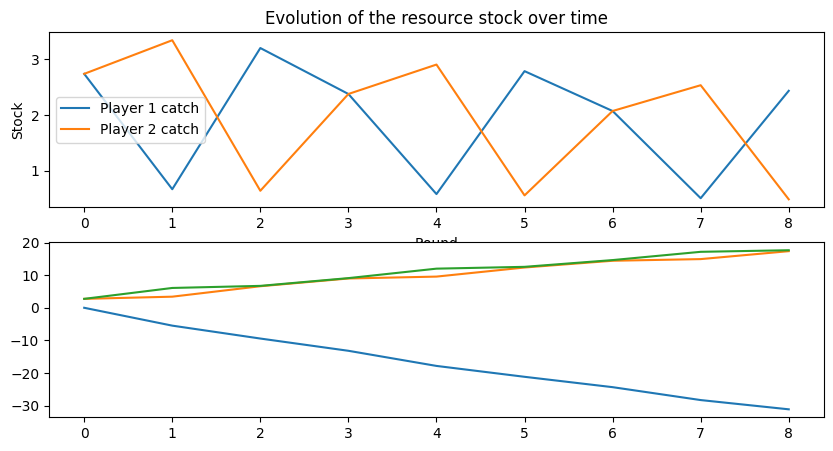

In [7]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
ax1.plot(catch_players[0, :], label='Player 1 catch')
ax1.plot(catch_players[1, :], label='Player 2 catch')
ax1.legend()
ax1.set_xlabel('Round')
ax1.set_ylabel('Stock')
ax1.set_title('Evolution of the resource stock over time')

ax2.plot(stock_evolution-stock_evolution[0], label='Stock evolution')
ax2.plot(cumulative_catch[0, :], label='Player 1 catch')
ax2.plot(cumulative_catch[1, :], label='Player 2 catch')


## Making the cost analysis

John Leach actually extended the analysis above to the a cost analysis. This made possible be the decreasing returns of the catch. The cost of fishing is given by $c = wb$, where $w$ is the cost of sending out a single boat. Let us now sketch the cost and the revenue of fishing as a function of the number of boats.

Text(0.5, 1.0, 'Total catch and cost as a function of effort')

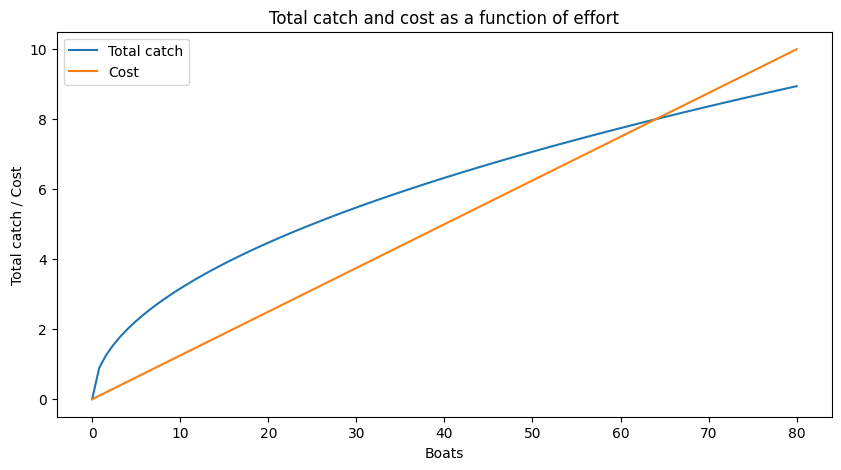

In [11]:
st = 100
b_t = np.linspace(0,80, 100)
prefix = 0.01
# cost prefix
w = 0.5
yt = y_t(st, b_t)
ct = c_t(b_t)
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(b_t, yt, label='Total catch')
ax.plot(b_t, ct, label='Cost')
ax.legend()
ax.set_xlabel('Boats')
ax.set_ylabel('Total catch / Cost')
ax.set_title('Total catch and cost as a function of effort')

so we can nicely see that the fishing is profiable as long as the revenue is larger than the cost. 

## Maximizing the profits for society

We have seen that each individual has an incentive to fish as much as possible until the profits go to zero. What about society ?

Society would like to maximize the total profits for the society. How can society do this ? Well simply maximize the total profits.

In [16]:
# get the value of where, where the profits crosses zero
profits = yt - ct

for i, p in enumerate(profits):
    if p < 0:
        print(f'Profits go to zero at effort {b_t[i]}')
        break

pIndividual = b_t[i]
# find the value of e where profits are maximized
max_profit_index = np.argmax(profits)
print(f'Maximum profits at effort {b_t[max_profit_index]} with profits {profits[max_profit_index]}')

Profits go to zero at effort 64.64646464646465
Maximum profits at effort 16.161616161616163 with profits 1.999949240834828


Text(0, 0.5, 'Profits')

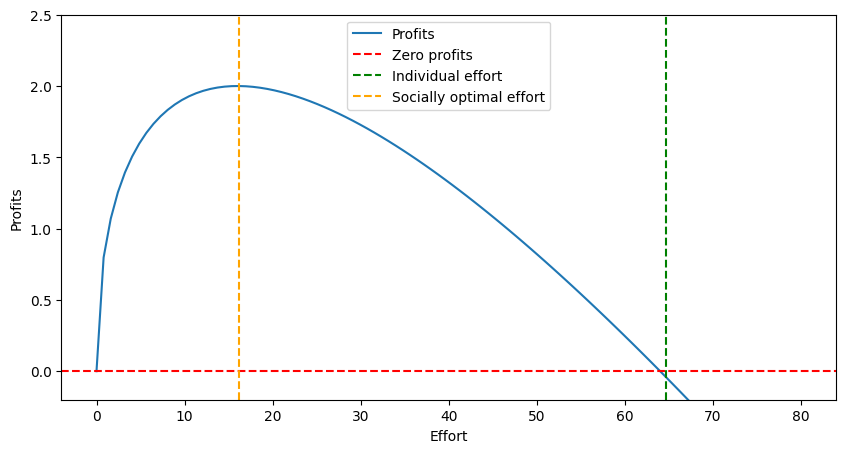

In [19]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(b_t, profits, label='Profits')
ax.axhline(0, color='red', linestyle='--', label='Zero profits')
ax.set_ylim(-0.2, 2.5)
ax.axvline(pIndividual, color='green', linestyle='--', label='Individual effort')
ax.axvline(b_t[max_profit_index], color='orange', linestyle='--', label='Socially optimal effort')
ax.legend()
ax.set_xlabel('Effort')
ax.set_ylabel('Profits')

What a nice visualization of overfishing. 

# Steady states

We would like to see what happens in a stable situation. There we have actually $g_t(s_t) = y_t(s_t, b_t)$. This depends really on the specific model. In the case of the book we can write:


$g_0 (s_t - g_1  s_t^2) = y_0  s_t  \sqrt{b_t}$

$g_0 (1 - g_1  s_t) = y_0  \sqrt{b_t}$

Solving for total number of boats that is sustainable: 

$b_{sust} = \left(\frac{g_0}{y_0} (1 - g_1  s_{init})\right)^2$

In the book they solve for $s_0$
$s_0 =  100 (1- \sqrt{b_t})$

In [6]:
# parameters of the growth rate
g0 = 0.03; g1 = 0.001

# parameters for the catches
y0 = 0.01

# initial stock
s_init = 100

b_sust = (g0/y0*(1-g1*s_init))**2
print(b_sust)

7.290000000000001


In [2]:
bt = np.linspace(0,1,100)
s0 = 100*(1- np.sqrt(bt))

f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(bt, s0, label='Stock evolution')
ax.set_xlabel('boats')
ax.set_ylabel('$s_0$')
ax.set_title('Stock evolution as a function of boats')

NameError: name 'np' is not defined